In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pywt
from sklearn.metrics import confusion_matrix

# Hàm biến đổi Wavelet
def wavelet_transform(img_path):
    img = cv2.imread(img_path)
    print(img.shape)
    # img = cv2.resize(img, (256,256))
    coeffs2 = pywt.dwt2(img, 'haar')
    LL, (LH, HL, HH) = coeffs2
    return LL


# Hàm tính Wavelet Hash
def wavelet_hash(LL):
    LL_small = cv2.resize(LL, (64,64), interpolation=cv2.INTER_AREA)
    #tinh gia tri trung binh
    mean = LL_small.mean()
    #chuyen ve bit 0 1
    hash_bits = (LL_small > mean).astype(np.uint8)
    # chuyen ve dang 1D vs bit 0 1
    return hash_bits.flatten()
images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg']
LLs = [wavelet_transform(img_path) for img_path in images]
hashes = [wavelet_hash(ll) for ll in LLs]
# So sánh hàm băm bằng khoảng cách Hamming
def hamming_distance(hash1, hash2):
    return np.sum(hash1 != hash2)
distances  = []
for i in range(len(hashes)):
    for j in range(i+1, len(hashes)):
        dist = hamming_distance(hashes[i], hashes[j])
        distances.append(dist)
        print(f"Hamming distance between image {i+1} and image {j+1}: {dist}")
max_dist = max(distances)
y_score = [1 - (d / max_dist) for d in distances]
print("Similarity Scores:", y_score)




(533, 800, 3)
(384, 512, 3)
(800, 1280, 3)
(600, 900, 3)
Hamming distance between image 1 and image 2: 4133
Hamming distance between image 1 and image 3: 5011
Hamming distance between image 1 and image 4: 5397
Hamming distance between image 2 and image 3: 4370
Hamming distance between image 2 and image 4: 3648
Hamming distance between image 3 and image 4: 1908
Similarity Scores: [np.float64(0.23420418751158045), np.float64(0.07152121549008705), np.float64(0.0), np.float64(0.19029090235315915), np.float64(0.3240689271817676), np.float64(0.6464702612562534)]


In [85]:
threshold = 0.7 # Ngưỡng để xác định ảnh giống nhau

y_pred = [1 if s >= threshold else 0 for s in y_score]
y_true = [0, 0, 0, 0, 0, 1]  # Giả sử nhãn thật cho các cặp ảnh
print("Predicted Labels:", y_pred)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

#do chinh xac
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.2f}")
#do nhay 
sensitivity = tp / (tp + fn)
print("Sensitivity:", sensitivity)
#do dac hieu
specificity = tn / (tn + fp)
print("Specificity:", specificity)

Predicted Labels: [0, 0, 0, 0, 0, 0]
Accuracy: 0.83
Sensitivity: 0.0
Specificity: 1.0


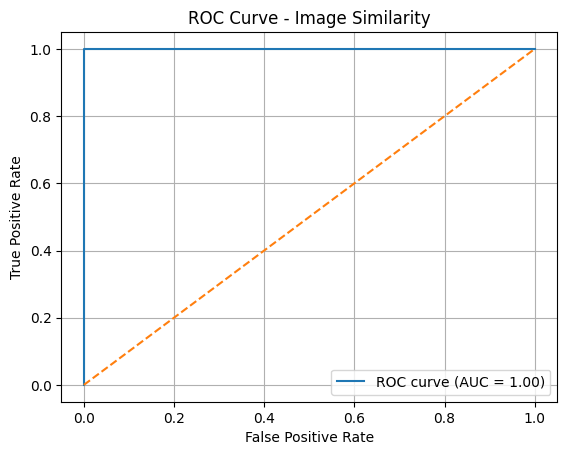

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Vẽ
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %.2f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Image Similarity')
plt.legend()
plt.grid()
plt.show()